# Exercise 06 : Scatter Matrix

In [76]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [77]:
con = sqlite3.connect("../data/checking-logs.sqlite")

In [78]:
con.execute("DROP TABLE IF EXISTS test")

query = """
SELECT ch.uid AS uid, labname, timestamp AS first_commit_ts,
    datetime AS first_view_ts
FROM checker ch 
LEFT JOIN pageviews pv
ON pv.uid = ch.uid
WHERE ch.uid LIKE 'user_%'
AND status = 'ready'
AND numTrials = 1
AND labname IN 
(
    'laba04', 'laba04s', 'laba05',
    'laba06', 'laba06s', 'project1'
)
AND 
(
    pv.datetime = 
    (
        SELECT MIN(datetime)
        FROM pageviews
        WHERE pageviews.uid=ch.uid
    )
    OR pv.datetime IS NULL
)
"""
test = pd.io.sql.read_sql(query, con, parse_dates=['first_commit_ts', 'first_view_ts'])
test = test[test['first_view_ts'].notnull()]
test.to_sql('test', con)
test

,uid,labname,first_commit_ts,first_view_ts
3,user_17,project1,2020-04-18 07:56:45.408648,2020-04-18 10:56:55.833899
4,user_30,laba04,2020-04-18 13:36:53.971502,2020-04-17 22:46:26.785035
7,user_30,laba04s,2020-04-18 14:51:37.498399,2020-04-17 22:46:26.785035
8,user_14,laba04,2020-04-18 15:14:00.312338,2020-04-18 10:53:52.623447
11,user_14,laba04s,2020-04-18 22:30:30.247628,2020-04-18 10:53:52.623447
18,user_19,laba04,2020-04-20 19:05:01.297780,2020-04-21 20:30:38.034966
19,user_25,laba04,2020-04-20 19:16:50.673054,2020-05-09 23:54:54.260791
20,user_21,laba04,2020-04-21 17:48:00.487806,2020-04-22 22:40:36.824081
21,user_30,project1,2020-04-22 12:36:24.053518,2020-04-17 22:46:26.785035
23,user_21,laba04s,2020-04-22 20:09:21.857747,2020-04-22 22:40:36.824081


In [79]:
query = """
SELECT uid, avg_diff
FROM
(
    SELECT uid,
        (CAST(strftime('%s', first_commit_ts) AS INT) - deadlines) / 3600
        AS avg_diff
    FROM test t
    JOIN deadlines dl
    ON t.labname = dl.labs
    WHERE NOT t.labname = 'project1'
)
"""
delta = pd.io.sql.read_sql(query, con)
delta = delta.groupby(['uid']).mean()
delta

,avg_diff
uid,
user_1,-64.400000
user_10,-74.800000
user_14,-159.000000
user_17,-61.600000
user_18,-5.666667
user_19,-98.750000
user_21,-95.500000
user_25,-92.600000
user_28,-86.400000


In [80]:
query = """
SELECT uid, COUNT(*) as pageviews
FROM pageviews
WHERE uid LIKE 'user_%'
GROUP BY uid
"""
views = pd.io.sql.read_sql(query, con)
views

,uid,pageviews
0,user_1,28
1,user_10,89
2,user_14,143
3,user_17,47
4,user_18,3
5,user_19,16
6,user_21,10
7,user_25,179
8,user_28,149
9,user_3,317


In [81]:
query = """
SELECT uid, COUNT(*) as num_commits
FROM checker
WHERE uid LIKE 'user_%'
AND labname <> 'project1'
GROUP BY uid
"""
commits = pd.io.sql.read_sql(query, con)
commits

,uid,num_commits
0,user_0,3
1,user_1,62
2,user_10,20
3,user_11,7
4,user_12,86
5,user_13,52
6,user_14,61
7,user_15,23
8,user_16,41
9,user_17,51


In [82]:
pivot = views.merge(commits, on=['uid'])
pivot = delta.merge(pivot, on=['uid'])
pivot = pivot.drop(columns=['uid'])
pivot

,avg_diff,pageviews,num_commits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


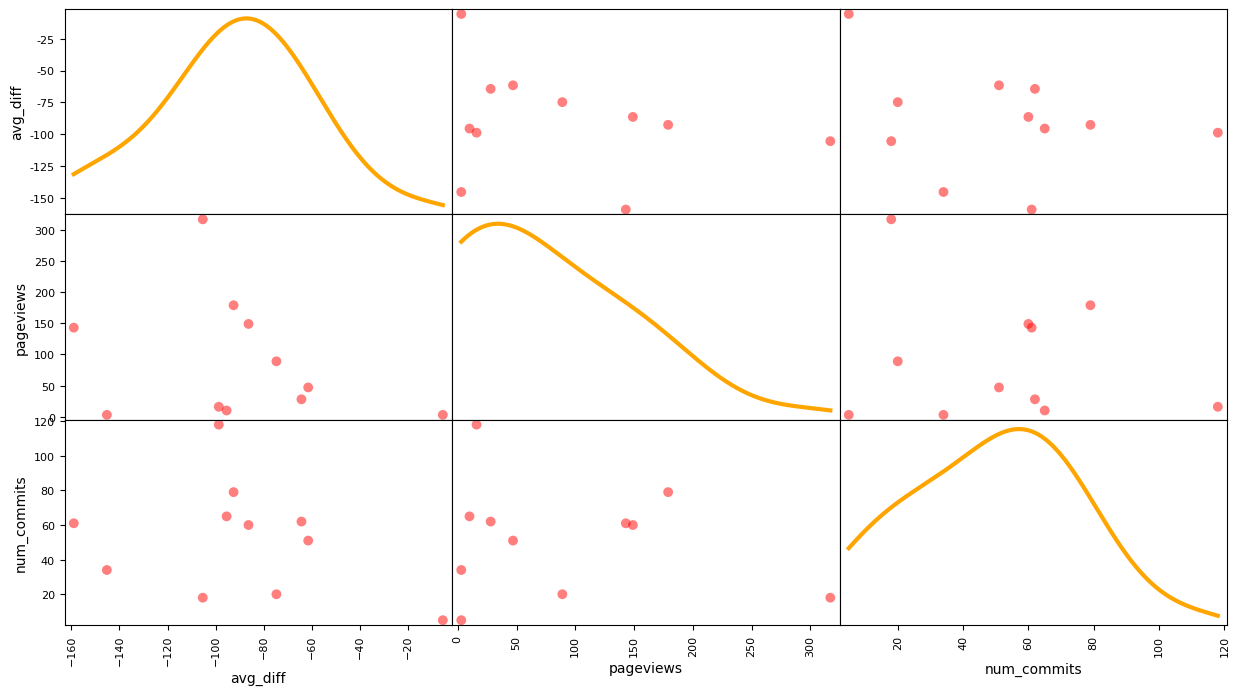

In [83]:
ax = scatter_matrix(pivot,
                    figsize=(15, 8),
                    diagonal='kde',
                    density_kwds=dict(color='orange', linewidth=3),
                    color='red',
                    s=200)

## Can we say that if a user has a low number of pageviews then they likely have a low number of commits?

## The answer is __no__

---

## Can we say that if a user has a low number of pageviews then they likely have a small average difference between the first commit and the lab deadline?

## The answer is __no__

---

## Can we say that there are many users with a low number of commits and a few with a high number of commits?

## The answer is __yes__

---

## Can we say that there are many users with a small average difference and a few with a large average difference?

## The answer is __no__ (depends on what we mean by "many")

In [84]:
con.close()